In [19]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier , RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [20]:
data = sns.load_dataset("titanic")

# filled missing values in age as well as embarked
data.fillna({'age' : data['age'].median()}, inplace=True)
data.fillna({'embarked': data['embarked'].mode()[0]}, inplace=True)


# changing into numbers
data['sex'] = data['sex'].map({'male':0,'female':1})
data["embarked"] = data["embarked"].map({"S": 0, "C": 1, "Q": 2})

X = data[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
y = data['survived']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
accuracy_results = {}
f1_results = {}
time_results = {}

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Train and evaluate
for name, model in models.items():
    start = time.time()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    end = time.time()

    accuracy_results[name] = acc
    f1_results[name] = f1
    time_results[name] = end - start

    print(f"{name}")
    print(f"Accuracy    : {acc}")
    print(f"F1 Score    : {f1}")
    print(f"Train Time  : {end - start} seconds")
    print("-" * 40)



Decision Tree
Accuracy    : 0.7988826815642458
F1 Score    : 0.7567567567567568
Train Time  : 0.012016534805297852 seconds
----------------------------------------
Random Forest
Accuracy    : 0.8268156424581006
F1 Score    : 0.7832167832167832
Train Time  : 0.25663065910339355 seconds
----------------------------------------
AdaBoost
Accuracy    : 0.8044692737430168
F1 Score    : 0.7619047619047619
Train Time  : 0.11155033111572266 seconds
----------------------------------------


C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Gradient Boosting
Accuracy    : 0.8044692737430168
F1 Score    : 0.7407407407407407
Train Time  : 0.16910839080810547 seconds
----------------------------------------


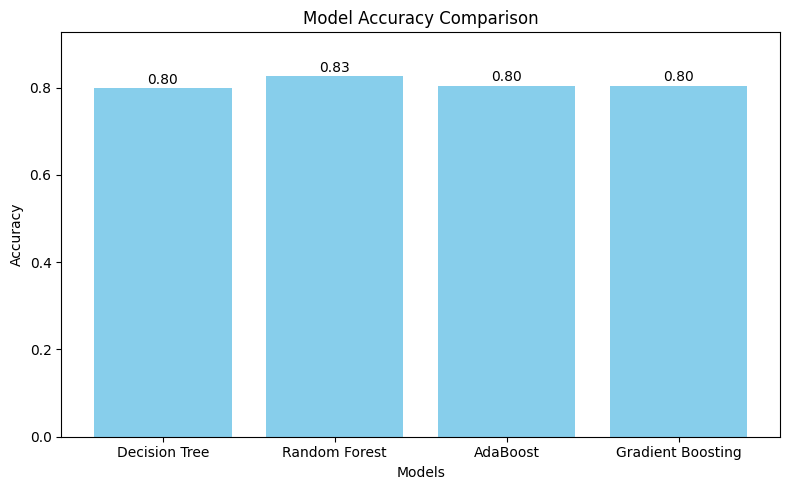

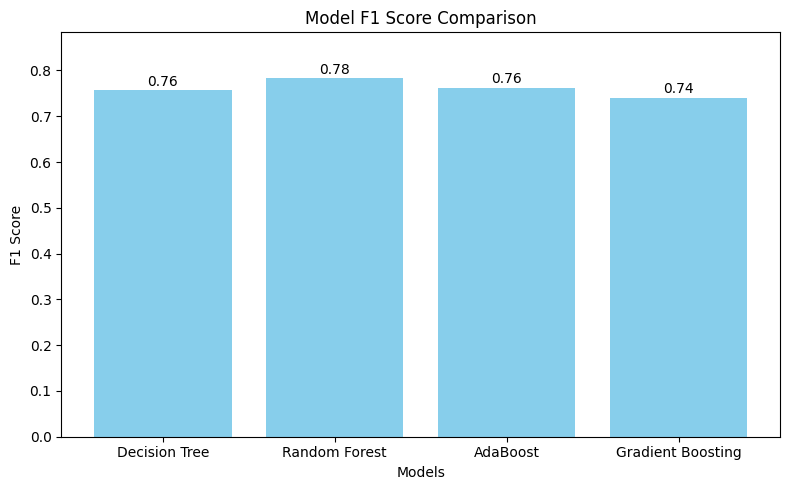

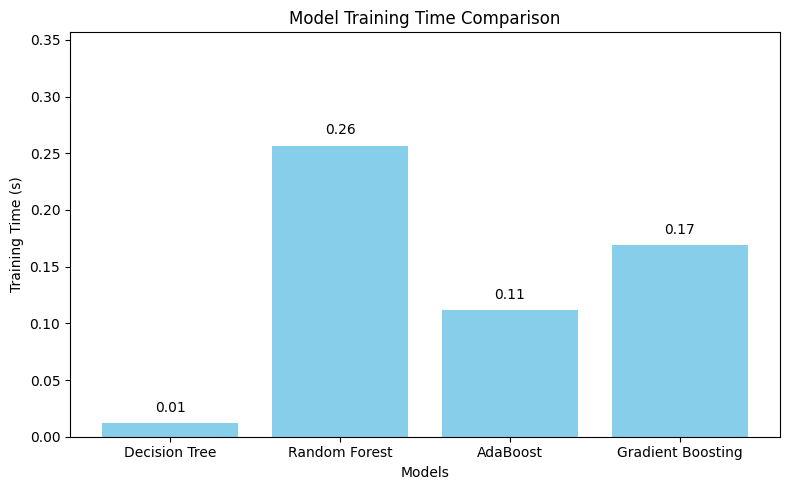

In [22]:
def plot_metric(metric_dict, title, ylabel):
    plt.figure(figsize=(8, 5))
    plt.bar(metric_dict.keys(), metric_dict.values(), color='skyblue')
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel('Models')
    plt.ylim(0, max(metric_dict.values()) + 0.1)
    for i, v in enumerate(metric_dict.values()):
        plt.text(i, v + 0.01, f"{v:.2f}", ha='center')
    plt.tight_layout()
    plt.show()

plot_metric(accuracy_results, 'Model Accuracy Comparison', 'Accuracy')
plot_metric(f1_results, 'Model F1 Score Comparison', 'F1 Score')
plot_metric(time_results, 'Model Training Time Comparison', 'Training Time (s)')